# Inteligência Artificial - Projeto da 2ª Unidade

**Equipe:** Arthur Angelo, Karen Evellyn e Maria Eduarda Azevedo.

**Base de Dados escolhida:** [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification).

**Paradigma de Aprendizagem:** Aprendizagem Supervisionada

**Tipo de Tarefa:** Classificação.




## 1. Escolha e Importação da Base de Dados

- Descreva de forma objetiva a base escolhida
- Coloque o link para a base de dados utilizada
- Explique que paradigma de Aprendizagem foi escolhido e com qual tarefa de IA vai abordar a base de dados
- Em seguida, utilizando o código pertinente, importe a base de dados.

In [ ]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

#Importação da base para o DataFrame

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fetal_health.csv')


Mounted at /content/drive


## 2. Análise Exploratória de Dados (EDA)

Um ponto de partida para uma boa EDA é verificar:
- Quantas linhas e colunas a base possui?
- Se for problema de classificação, observar distribuição das classes
- Há dados faltantes? Como estão distribuídos?
- Há linhas duplicadas?
- Quais são as distribuições de dados em cada coluna?
- Há colunas com valores categóricos ordenáveis ou não ordenáveis?
- Existem variáveis de entrada que possuem alta correlação entre si?
- Há variáveis de entrada que possuem alta correção com as saídas?

Recomendo que leiam sobre EDA e que não se limitem aos pontos acima.

### 2.1. Achados da Análise Exploratória:

- Recomendo que descrevam nesse ponto que observaram utilizando o código que estará presente na seção acima

In [ ]:
print("1. Contagem de linhas e colunas")
dimensoes = df.shape
print("Linhas: ", dimensoes[0])
print("Colunas: ", dimensoes[1])

1. Contagem de linhas e colunas
Linhas:  2126
Colunas:  22


#### Quantidade de linhas e colunas:
  - A base de dados contém 2.126 linhas e 22 colunas, e com isso é possível aplicar corretamente as técnicas de aprendizagem de máquina. As colunas são referentes às seguintes variáveis:

   - 'baseline value': Frequência cardíaca fetal (FHR) basal em batimentos por
minuto
   - 'accelerations': Número de acelerações por segundo
   - 'fetal_movement': Número de movimentos fetais por segundo
   - 'uterine_contractions': Número de contrações uterinas por segundo
   - 'light_decelerations': Número de desacelerações leves por segundo
   - 'severe_decelerations'; Número de desacelerações severas por segundo
   - 'prolongued_decelerations': Número de desacelerações prolongadas por segundo
   - 'abnormal_short_term_variability': Percentual de tempo com variabilidade anormal de curto prazo
   - 'mean_value_of_short_term_variability': Valor médio da variabilidade de curto prazo
   - 'percentage_of_time_with_abnormal_long_term_variability': Percentual de tempo com variabilidade anormal de longo prazo
   - 'mean_value_of_long_term_variability': Valor médio da variabilidade de longo prazo
   - 'histogram_width': Largura do histograma da FHR
   - 'histogram_min': Mínimo (baixa frequência) do histograma da FHR
   - 'histogram_max': Máximo (alta frequência) do histograma da FHR
   - 'histogram_number_of_peaks': Número de picos no histograma
   - 'histogram_number_of_zeroes': Número de zeros no histograma
   - 'histogram_mode': Moda do histograma
   - 'histogram_mean': Média do histograma
   - 'histogram_median': Mediana do histograma
   - 'histogram_variance': Variância do histograma
   - 'histogram_tendency': Tendência do histograma
   - 'fetal_health'(alvo): Classificado como 1 (Normal), 2 (Suspeito) e 3 (Patológico)


2. Distribuição das classes
Quantidade de classes:  3

    Classe  Quantidade  Frequência
0     1.0        1655    0.778457
1     2.0         295    0.138758
2     3.0         176    0.082785 



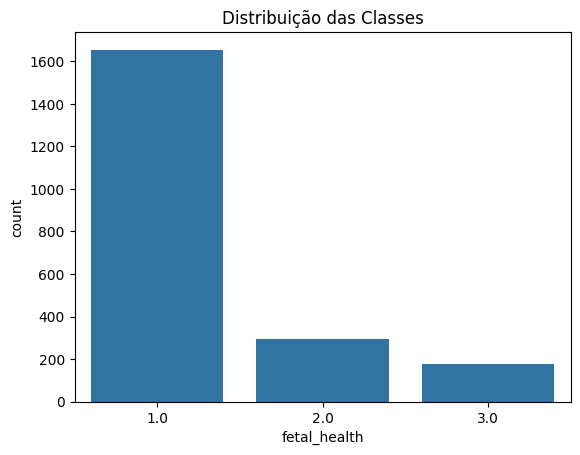

In [ ]:
print("2. Distribuição das classes")
quantidade_classes = df['fetal_health'].nunique()
print("Quantidade de classes: ", quantidade_classes)

dict_classes_valores = df['fetal_health'].value_counts().to_dict()
dict_classes_frequencia = df['fetal_health'].value_counts(normalize=True).to_dict()

df_classes = pd.DataFrame({
    'Classe': dict_classes_valores.keys(),
    'Quantidade': dict_classes_valores.values(),
    'Frequência': (dict_classes_frequencia.values())
})

print("\n", df_classes, "\n")

sns.countplot(data= df, x="fetal_health")
plt.title("Distribuição das Classes")
plt.show()

#### Distribuição das classes:
  - A variável alvo fetal_health apresenta três classes, traduzidas da seguinte maneira:
	Classe 1 (Normal), Classe 2 (Suspeito), Classe 3 (Patológico)
  - A Classe 1 (Normal) é a mais comum, representando cerca de 78% dos casos, seguida pela Classe 2 (Suspeito) com 13.88%, e por fim a Classe 3 (Patológico) com 8.28%.
  - Analisando esse cenário, percebe-se que há um desbalanceamento de dados. Essa situação pode levar a interpretações errôneas do cenário, afetando principalmente as clases 2 e 3.

In [ ]:
print("3. Verificação de dados faltantes")
print(df.isnull().sum())

3. Verificação de dados faltantes
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histog

#### Dados faltantes:
  - Pela verificação, viu-se que não há valores ausentes em nenhuma das variáveis do conjunto de dados, não sendo necessário adição ou remoção de registros


In [ ]:
print("4. Verificação de linhas duplicadas")
print(df.duplicated().sum(), " linhas duplicadas")

4. Verificação de linhas duplicadas
13  linhas duplicadas


#### Linhas duplicadas:
  - Pela verificação, constatou-se o total de 13 linhas duplicadas na base de dados, talvez inseridos por engano ou de fato cenários idênticos dos registros em si, se elas se comportam se maneira semelhante ou não, etc.

In [ ]:
print("5. Estatística Descritiva")
df.describe().T

5. Estatística Descritiva


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### Estatística descritiva e Distribuição dos dados:
  - Avaliando um panorama geral dos dados, temos as tendências centrais, dispersões e possíveis valores extremos
   - A média da variável fetal_health é 1.30, com mediana de 1, indicando que a maioria dos fetos são classificados como Normal (1).
   - A variável baseline value(FHR) possui média igual a 133.3 bpm e desvio padrão de 9,84 bpm
   - Algumas variáveis tiveram suas médias bem próximas de 0 ou 0: accelerations, fetal_movement, light_decelerations e severe_decelerations
   - A variável percentage_of_time_with_abnormal_long_term_variability te, valores mínimo e máximo bem discrepantes: 0.0 e 91.0


6. Distribuição de dados em cada coluna


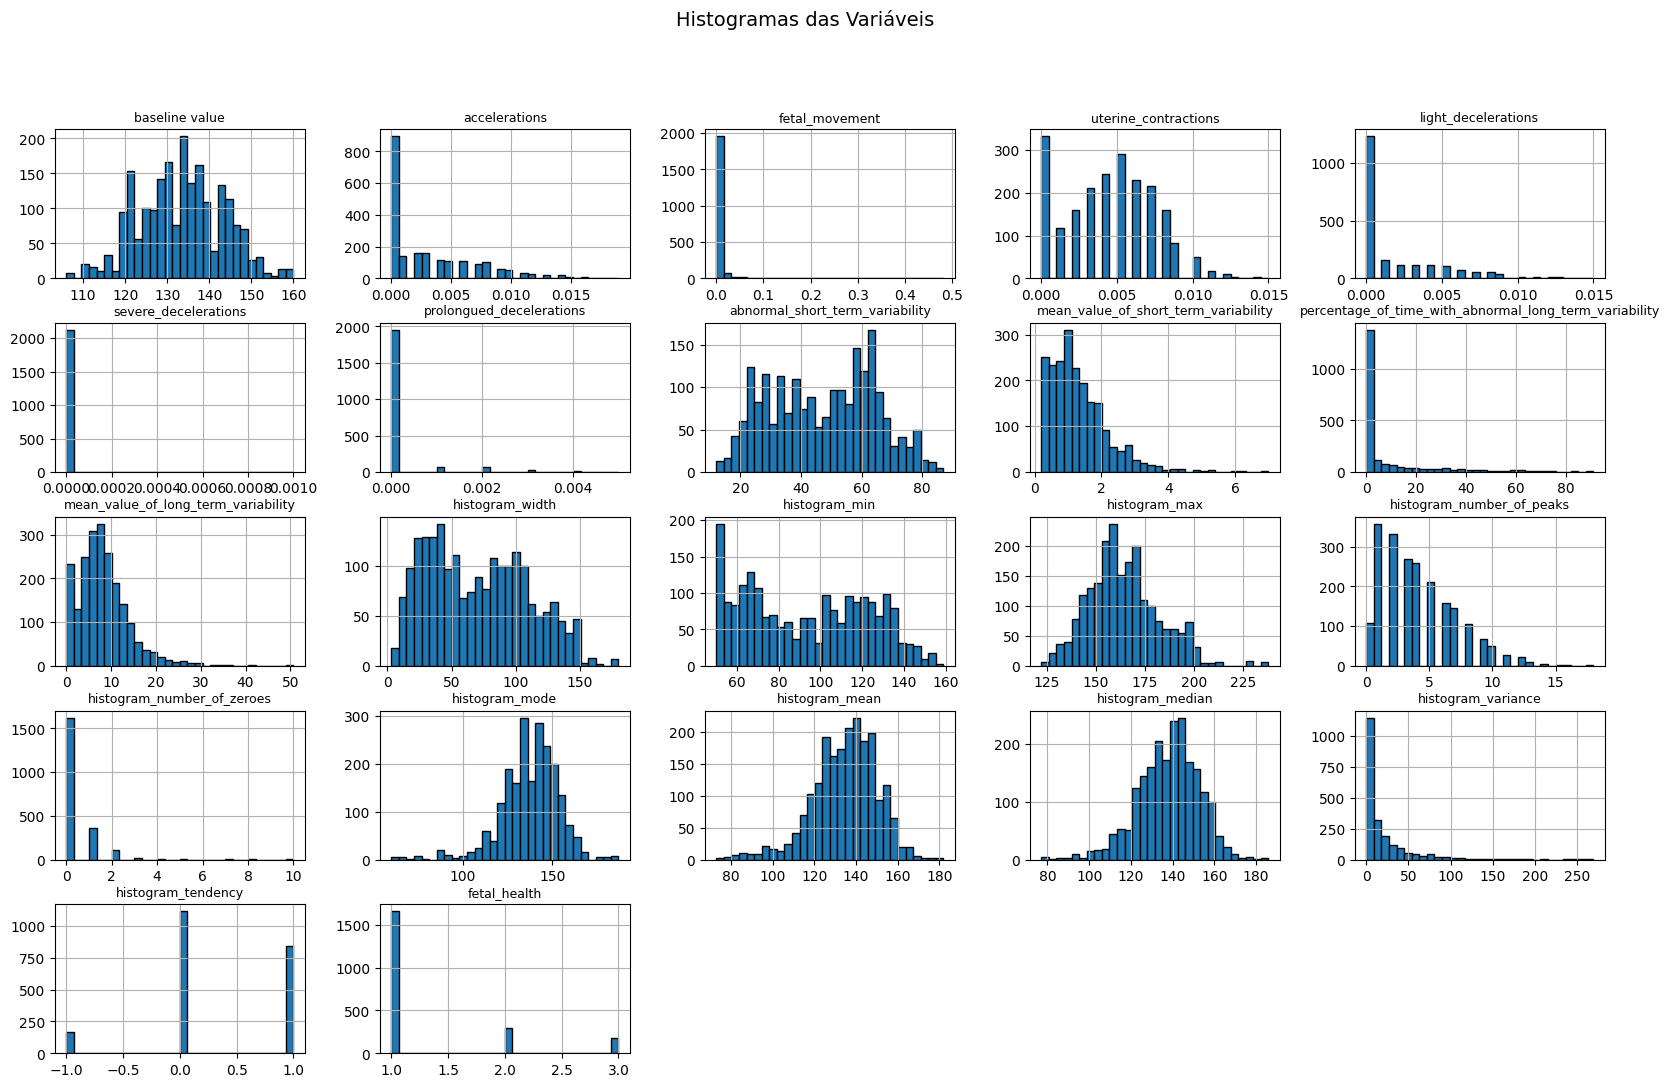

In [ ]:
print("6. Distribuição de dados em cada coluna")
histograma = df.hist(figsize=(20, 12), bins=30, edgecolor='black')
for eixo in histograma.flatten():
  eixo.set_title(eixo.get_title(), fontsize=9)
plt.suptitle("Histogramas das Variáveis", fontsize=14)
plt.show()

  - Na distribuição dos daods, temos histogramas com um formato de sino (como baseline value, histogram_mean, histogram_median) que indicam que os dados seguem uma distribuição normal. Histogramas com assimetria à direita, como accelerations, prolonged_decelerations, percentage_of_time_with_abnormal_long_term_variability, indicam que a maioria dos valores está concentrada em uma faixa menor, com alguns valores mais altos. Histogramas com assimetria à esquerda significam que a maioria dos dados está em valores mais altos, porém não foram encontrados nenhum com essa assimetria muito relevante.

In [ ]:
print("7. Verificação de colunas com valores categóricos ordenáveis ou não ordenáveis")
df.info()

print("\n")

colunas_categoricas = []

for coluna in df.columns:
  if df[coluna].dtype == 'object':
    colunas_categoricas.append(coluna)

if len(colunas_categoricas) == 0:
  print("Não há colunas com valores categóricos ordenáveis ou não ordenáveis")
else:
  print("Colunas com valores categóricos ordenáveis ou não ordenáveis: ", colunas_categoricas)

7. Verificação de colunas com valores categóricos ordenáveis ou não ordenáveis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability             

#### Valores categóricos ordenáveis ou não ordenáveis:
  - O resultado indica que todas as 22 colunas do dataset são do tipo float64. No Pandas, colunas com valores categóricos  geralmente são armazenadas como object, ou category se já convertidos. Logo, não há colunas com valores categóricos ordenáveis ou não ordenáveis

8. Verificação de correlação entre as variáveis


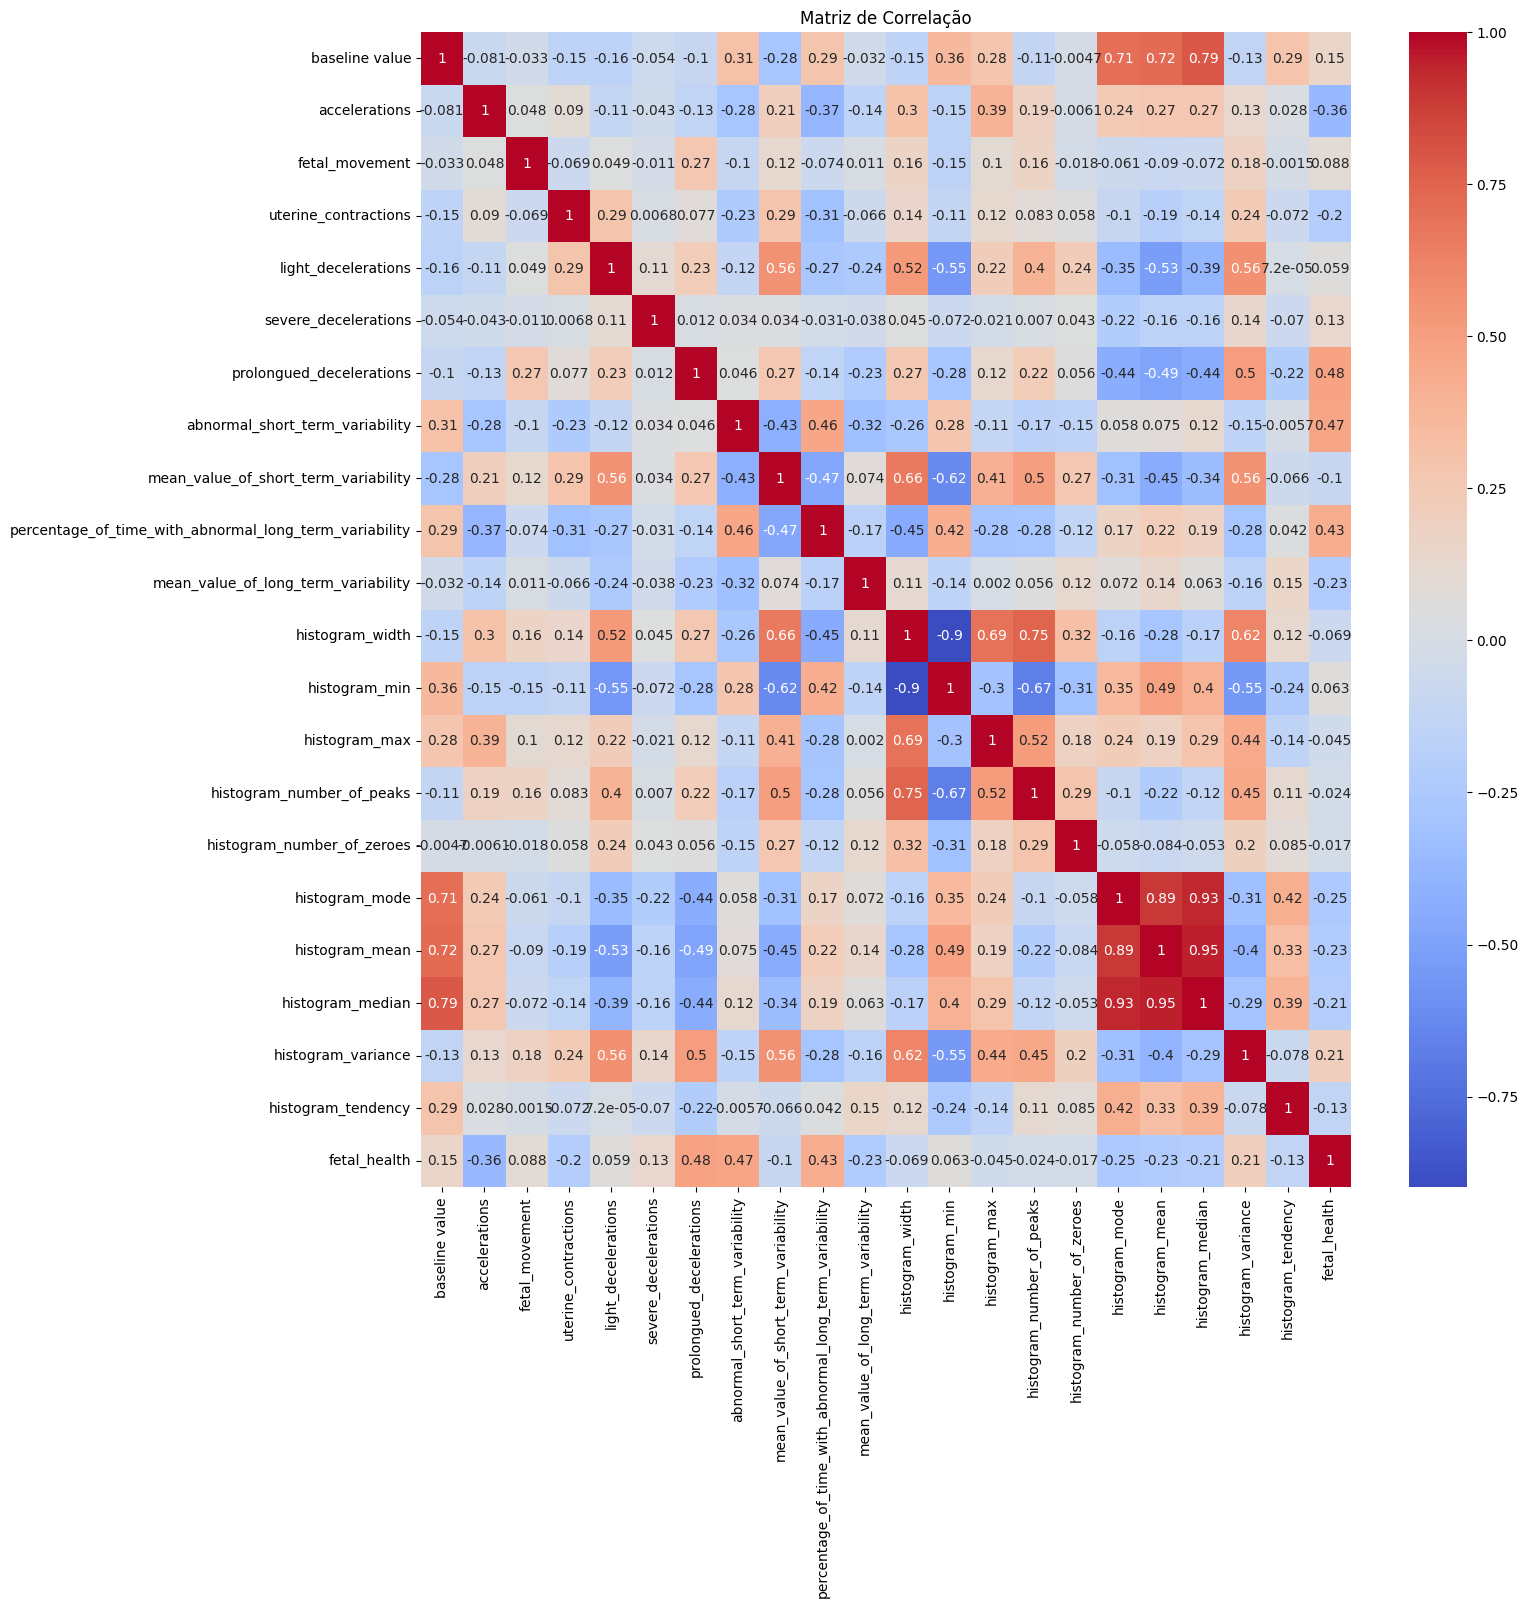

In [ ]:
print("8. Verificação de correlação entre as variáveis")
plt.figure(figsize=(15,15))
matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

#### Correlação entre variáveis:
  - A correlação das variáveis entrei si indicam as relações internas do conjunto de dados. Pode-se observar que:
   - As variáveis histogram_mean, histogram_median, histogram_mode e histogram_max possuem correlação acima de 0.9 entre si, logo elas medem aspectos muito semelhantes do histograma
   - Correlação relativamente alta entre abnormal_short_term_variability e percentage_of_time_with_abnormal_long_term_variability (0.46), pois ambas medem variações anormais nos batimentos fetais.
   - Correlação relativamente alta entre histogram_width e histogram_variance (0.62), pois ambas indicam dispersão da frequência cardíaca fetal.

In [ ]:
print("9. Verificação de correlação com a variável alvo")
variavel_alvo = df.corr()['fetal_health'].drop('fetal_health')
print(variavel_alvo.sort_values(ascending=False))

9. Verificação de correlação com a variável alvo
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.103382
histogram_ten

#### Correlação entre variáveis e saídas:

---


  - As variáveis que possuem alta correlação com a varia´vel alvo (fetal_health) indicam que, quanto maior seus valores, mais chance da classificação final ser Suspeito (2) ou Patológico (3). Essas são:
   - prolongued_decelerations (0.48): Forte correlação. Quanto maior uma desaceleração da FHR maior o sofrimento fetal.
   - abnormal_short_term_variability (0.47): Alta variabilidade anormal da FHR de curto prazo tem grandes chances de significar uma instabilidade na regulação fetal.
   - percentage_of_time_with_abnormal_long_term_variability (0.42): A longo prazo, quanto mais tempo a variabilidade da FHR permanece fora do normal, mais chances de ser Patológico (3).
  - Por outro lado, as variáveis com correlação mais fraca com fetal_health são:
	accelerations (-0.36), histogram_mode (-0.25), mean_value_of_long_term_variability (-0.22), uterine_contractions (-0.20)

10. Verificação de dados discrepantes


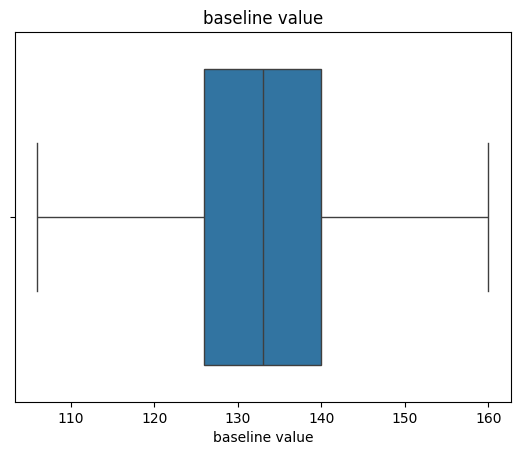

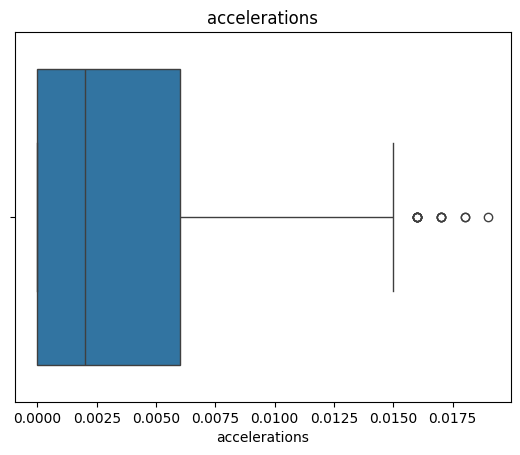

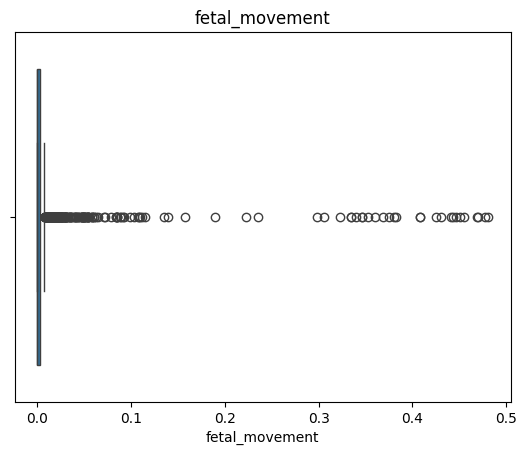

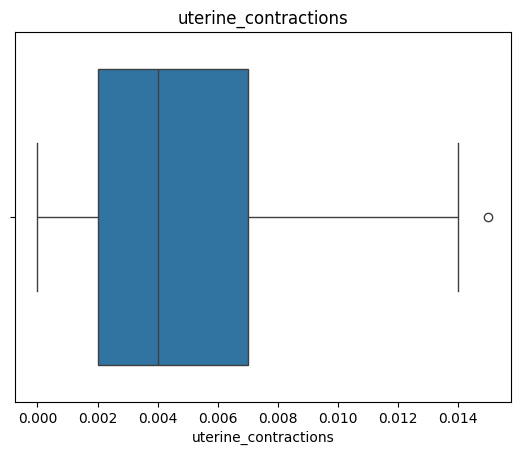

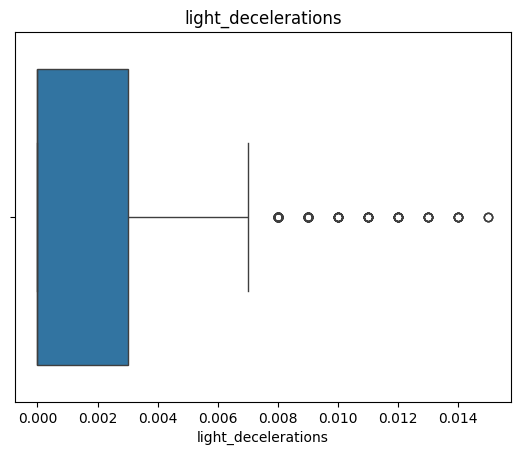

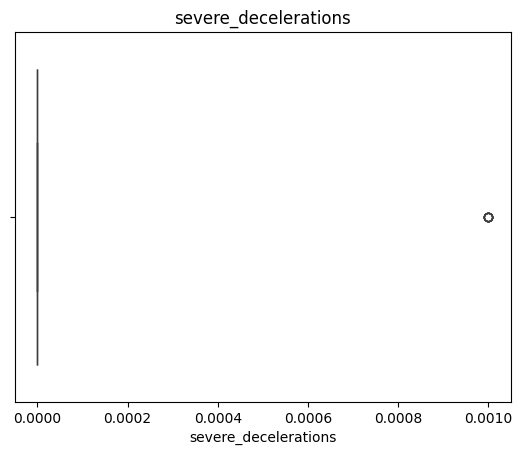

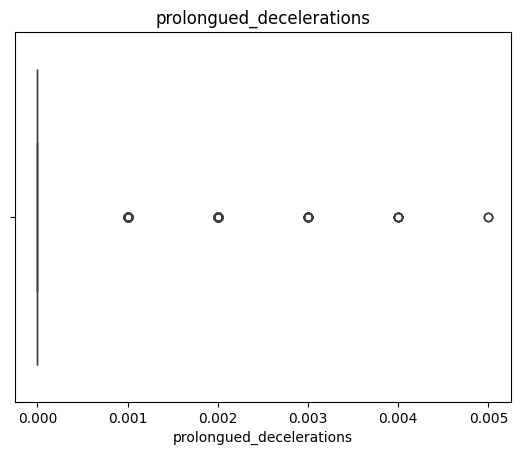

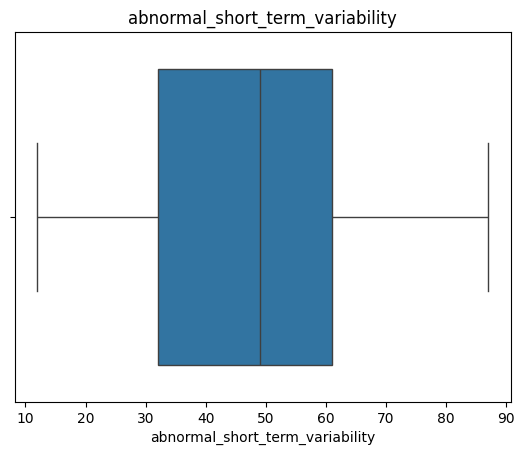

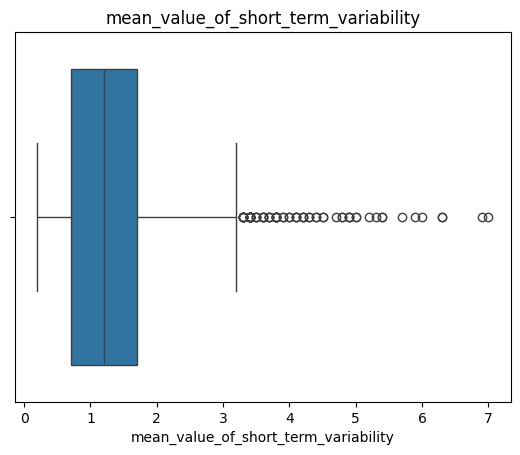

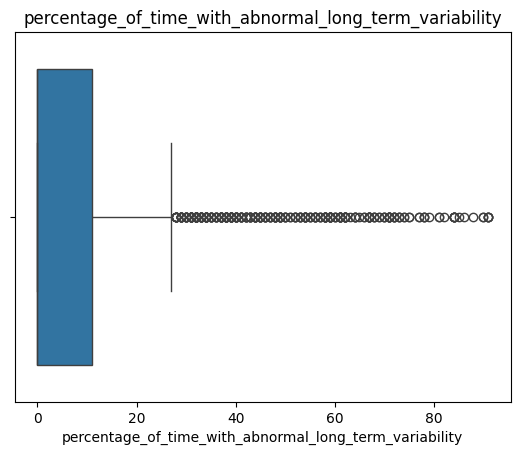

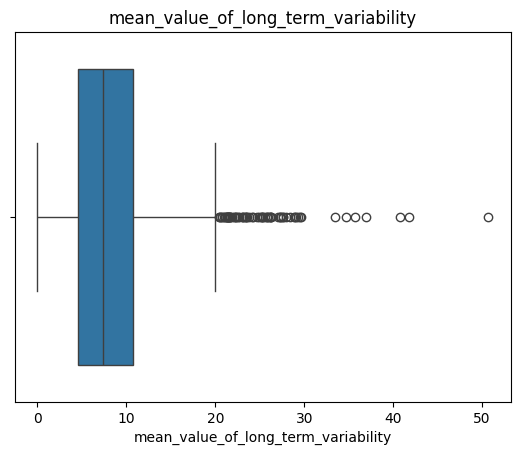

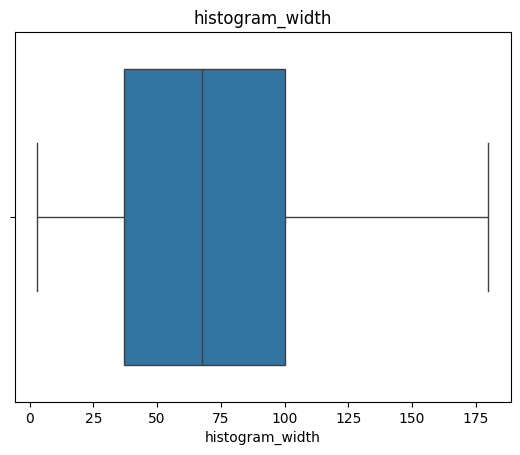

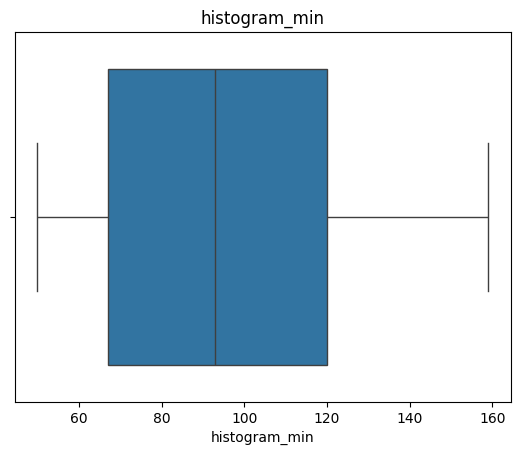

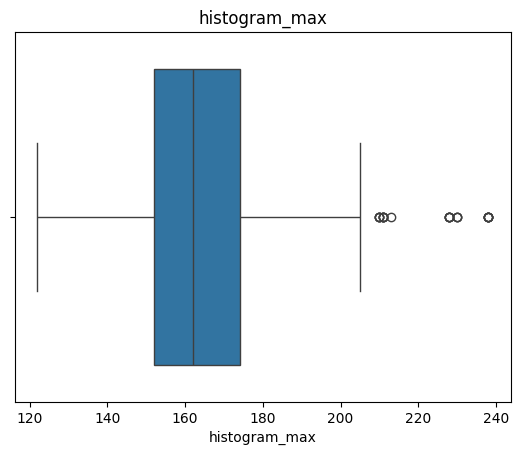

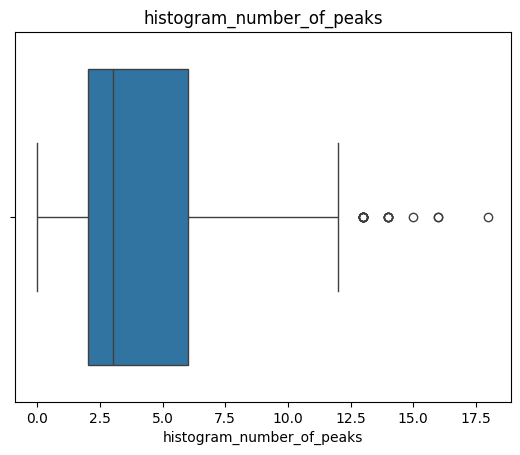

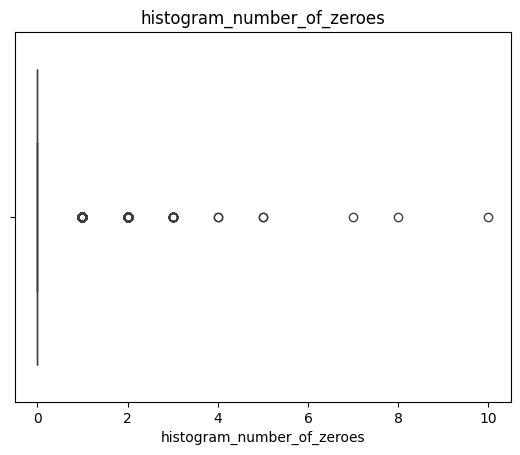

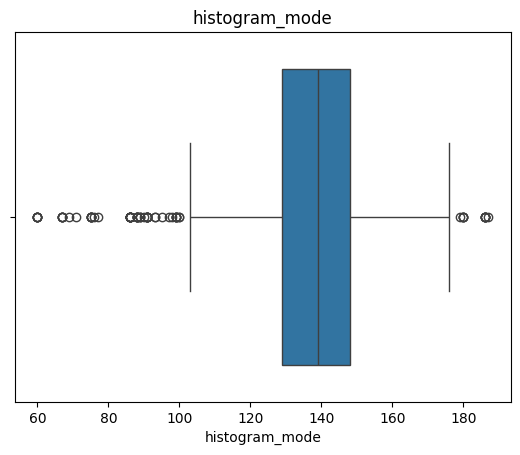

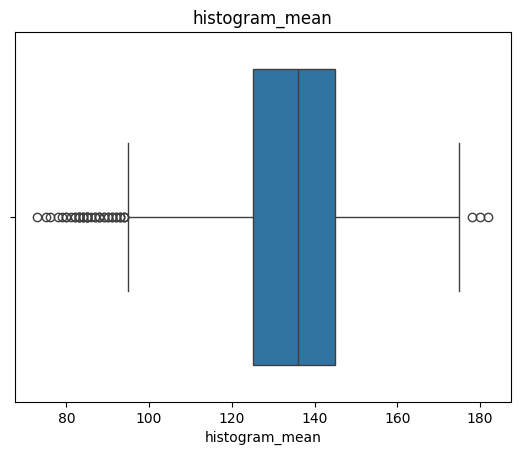

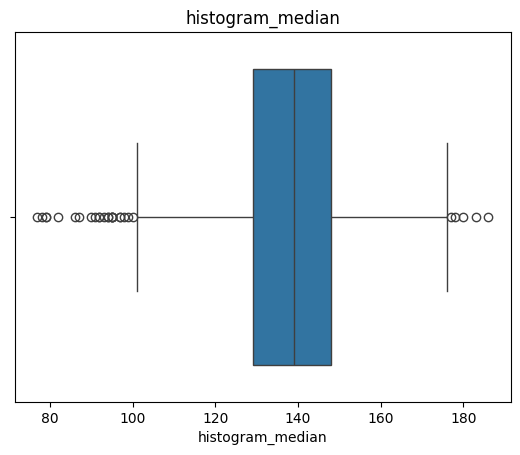

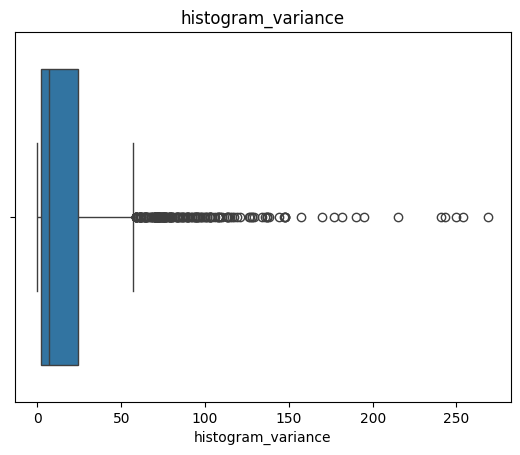

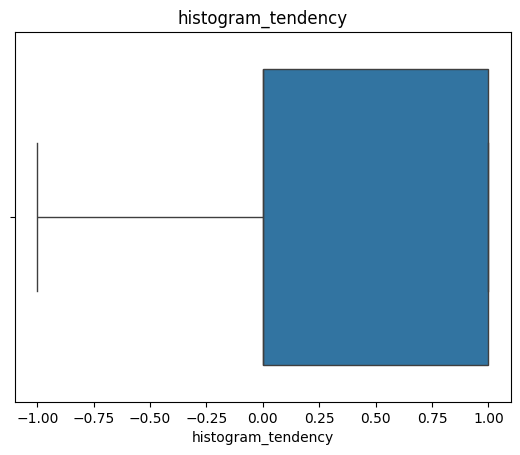

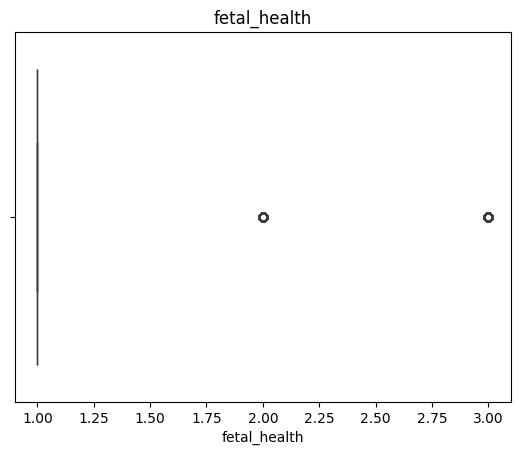

In [ ]:
print("10. Verificação de dados discrepantes")
colunas = list(df.columns.values.tolist())

for col in colunas:
  sns.boxplot(data=df, x=col)
  plt.title(col)
  plt.show()

#### Presença de Outliners:
  - Os boxplots apresentados exibem a distribuição dos dados e indicam uma possivel presença de outliners, que são representados pelos pontos que se encontram além dos limites do boxplot.
  - As variáveis que apresentam esses dados discrepantes com mais significância foram:
    - accelerations,
    - fetal_movement,
    - light_decelerations,
    - prolongued_decelerations,
    - mean_value_of_short_term_variability,
    - percentage_of_time_with_abnormal_long_term_variability,
    - mean_value_of_long_term_variability,
    - histogram_max,
    - histogram_number_of_peaks,
    - 'histogram_number_of_zeroes,
    - histogram_mode,
    - histogram_mean,
    - histogram_median,
    - histogram_variance



---



## 3. Preparação dos Dados

Considerando os achados da EDA elencados acima:
- Se a base possui muito mais linhas que colunas, que tipo de seleção de características você vai utilizar?
- A base possui linhas duplicadas? Como você vai tratar isso?
- Em casod e dados faltantes, você vai excluir as colunas, linhas ou vai realizar imputação de dados?
- Se você possui dados categóricos, como vai lidar com eles?
- Ao final dessa seção, a sua base de dados deve estar pronta para treinar modelos adequados para o tipo de paradigma e tarefa que você definiu.

### 3.1 Número de linhas maior que número de colunas:



---






*   Geralmente, ter uma quantidade de linhas considerávelmente maior à quantidade de variáveis é caracterizado como um bom cenário. O dataset analisado está dentro dos padrões nesse quesito.

*   Quando se fala da seleção de características do dataset, é necessa´rio ter atenção em alguns pontos. Em datasets que possuem muitas variáveis e alta correlação entre elas, busca-se aplicar técnicas de redução de dimensionalidade para facilitar a captura de padrões relevantes pelos modelos e evitar redundância de dados. Como visto acima, as variáveis **histogram_mean, histogram_median, histogram_mode e histogram_max** possuem correlação acima de 0.9 e estão medindo aspectos semelhantes, mas decidimos mantê-las, visto que são importantes para minimizar o impacto de outliers e ajudam o modelo a entender certos padrões, como os valores mais frequentes que são influentes em certas condições fetais


### 3.2 Removendo linhas duplicadas

---



In [ ]:
print("4. Verificação de linhas duplicadas")
print(df.duplicated().sum(), " linhas duplicadas")

4. Verificação de linhas duplicadas
13  linhas duplicadas


In [ ]:
df = df.drop_duplicates()

print("Após remoção de duplicatas:")
print(df.duplicated().sum(), " linhas duplicadas")

Após remoção de duplicatas:
0  linhas duplicadas


### 3.3 Resolvendo o cenário de desbalanceamento dos dados

---



Analisando a frequência das distribuições das classes, nota-se o seguinte cenário na quantidade de labels:

* **Classe 1** (Normal) - 0.778457 (aproximadamente 78% dos diagnósticos),
* **Classe 2** (Suspeito) - 0.138758 (aproximadamente 13,8% dos diagnósticos),
* **Classe 3** - (Patológico) - 0.082785 (aproximadamente 8,28% dos diagnósticos)


Essa distribuição desigual pode influenciar negativamente o modelo durante a classificação das classes minoritárias, sendo necessário utilizar técnicas de *Reamostragem dos dados*


### 3.4 Reamostragem dos dados - Subamostragem

---

Reduzindo o número de ocorrências da classe majoritária para equilibrar a distribuição.

In [ ]:
from sklearn.utils import resample

df_majority = df[df['fetal_health'] == 1]
df_minority_2 = df[df['fetal_health'] == 2]
df_minority_3 = df[df['fetal_health'] == 3]

n_samples = len(df_minority_2) + len(df_minority_3)

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=n_samples,
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority_2, df_minority_3])



#### Distrubuição das classes após Subamostragem



---



2. Distribuição das classes
Quantidade de classes:  3

    Classe  Quantidade  Frequência
0     1.0         467    0.500000
1     2.0         292    0.312634
2     3.0         175    0.187366 



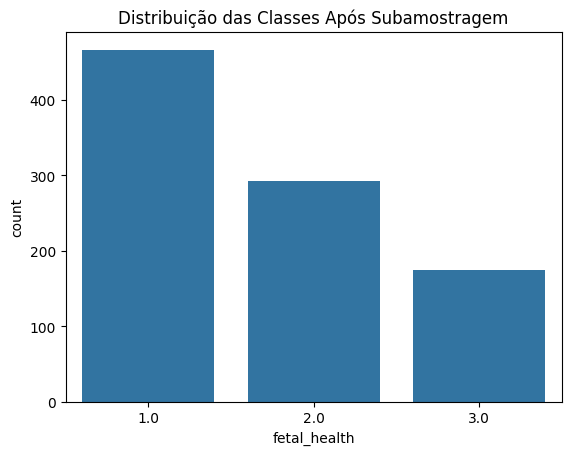

In [ ]:
print("2. Distribuição das classes")
quantidade_classes = df_balanced['fetal_health'].nunique()
print("Quantidade de classes: ", quantidade_classes)


dict_classes_valores = df_balanced['fetal_health'].value_counts().to_dict()
dict_classes_frequencia = df_balanced['fetal_health'].value_counts(normalize=True).to_dict()


df_classes = pd.DataFrame({
    'Classe': dict_classes_valores.keys(),
    'Quantidade': dict_classes_valores.values(),
    'Frequência': list(dict_classes_frequencia.values())
})


print("\n", df_classes, "\n")

sns.countplot(data=df_balanced, x="fetal_health")
plt.title("Distribuição das Classes Após Subamostragem")
plt.show()



### Dados Faltantes


---









*   De acordo com a análise feita no ponto 2.3, não há a presença de dados faltantes. Nesses casos, é recomendada a retirada de linhas com  valores faltantes, ou a realização do input desses dados.


### Valores Categóricos


---




*   De acordo com a a análise feita no ponto 2.7, não há a presença de valores categóricos. Nesses casos, a recomendação é a conversão dessas variáveis para o tipo numérico.



### Separação dos conjuntos para treinamento e teste após a normalização

---



In [ ]:
from sklearn.model_selection import train_test_split


X_balanced = df_balanced.drop(columns=['fetal_health'])
y_balanced = df_balanced['fetal_health']

# Dividir os dados balanceados em conjunto de treino (70%) e conjunto de teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1, stratify=y_balanced)


print("Distribuição de classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição de classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Distribuição de classes no conjunto de treino:
fetal_health
1.0    0.500759
2.0    0.312595
3.0    0.186646
Name: proportion, dtype: float64

Distribuição de classes no conjunto de teste:
fetal_health
1.0    0.498233
2.0    0.314488
3.0    0.187279
Name: proportion, dtype: float64




---



## 4. Modelagem e Avaliação de Resultados

- Aqui a equipe deve escolher as 5 técnicas que vai utilizar,de acordo com o paradigma de aprendizagem e tipo de tarefa de IA, e justificar a escolha.

- Também devem ser selecionadas as duas métricas que serão utilizadas e justificar sua escolha.

- O código envolve importar os modelos pertinentes, treinar e avaliar conforme as métricas, ponderando inicialmente se é necessário avaliar outros hiperparâmetros ou não (ver subseção 4.1 abaixo)

### 4. Otimização de Hiperparâmetros

- Se os resultados obtidos com a configuração padrão não forem acima de 85% (ou equivalente), escolha ao menos 3 hiperparâmetros por técnica, escolha ao menos 3 valores diferentes e os teste para verificar se é possível obter resultados melhores.

### 4.1  Random Forest

---



### 4.2 Decision Tree

---



In [ ]:
# Importar árvore de decisão
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Treinar árvore
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_train_pred = decision_tree.predict(X_train)
print("Acurácia Treinamento = ",accuracy_score(y_train,y_train_pred) )
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train,y_train_pred))

print()

y_test_pred = decision_tree.predict(X_test)
print("Acurácia Teste = ",accuracy_score(y_test,y_test_pred) )
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test,y_test_pred))

Acurácia Treinamento =  1.0
Matriz de Confusão Treinamento = 
[[330   0   0]
 [  0 206   0]
 [  0   0 123]]

Acurácia Teste =  0.8268551236749117
Matriz de Confusão Teste = 
[[122  18   1]
 [ 21  63   5]
 [  2   2  49]]


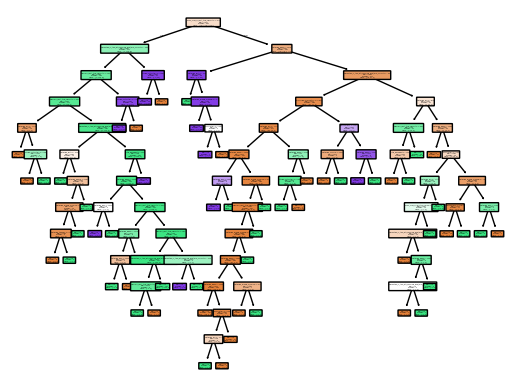

In [ ]:
from sklearn import tree
_ = tree.plot_tree(decision_tree,
                   feature_names=['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency'],
                   class_names=['Normal','Suspeito','Patológico'],
                   filled=True, rounded=True)

### 4.3 Logistic Regression

---



In [ ]:
import seaborn as sns

# API para modelo de Regressão Logística
import statsmodels.api as sm

# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score)

In [ ]:
X = df_balanced.drop(columns=['fetal_health'], axis = 1)
y = df_balanced['fetal_health']

X = sm.add_constant(X)

In [ ]:
logit = sm.Logit(y_train, X_train)

ValueError: endog must be in the unit interval.

### 4.4 Multi-Layer Perceptron

---



### 4.5 k-Nearest Neighbors - k-NN

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k = 15
modelo_knn = KNeighborsClassifier(n_neighbors=k)

modelo_knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
predicoes = modelo_knn.predict(X_test_scaled)

In [ ]:
acuracia_knn = accuracy_score(y_test , predicoes)
acuracia_knn = format(round(acuracia_knn,2))
print("Acurácia : ", acuracia_knn)

Acurácia :  0.86


In [ ]:
print(classification_report(y_test , predicoes))

              precision    recall  f1-score   support

         1.0       0.91      0.88      0.89       140
         2.0       0.76      0.85      0.80        88
         3.0       0.91      0.81      0.86        53

    accuracy                           0.86       281
   macro avg       0.86      0.85      0.85       281
weighted avg       0.86      0.86      0.86       281



In [ ]:
auc_roc = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled), multi_class="ovr")
auc_roc = format(round(auc_roc,2))
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.96


## 5. Discussão dos Resultados

- Agrupe os resultados da seção anterir como uma tabela e coloque-os aqui.
- Essa tabela deve conter 5 linhas (uma para cada modelo avaliado) e três colunas (Modelo | Métrica 1 | Métrica 2). Talvez seja mais fácil colar uma tabela feita noutro software.
- Nesse ponto, à luz dos resultados obtidos, você deve discutir que modelo recomenda aplicar para solucionar o problema sendo trabalhado.